In [17]:
# @title set environment
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cv2

In [18]:
# @title PLA algorithm
def PLA_no_bias(X, y, number_of_generations ):
    N,d = X.shape
    normal = np.random.randn(d,)
    
    for _ in range(number_of_generations):
        # find one wrong sample
        for i in range(N):
            if np.dot(X[i], normal) * y[i] <= 0:
                normal += y[i] * X[i]
                # print accuracy
                if _ % 100 == 99:
                    print("Iter %s: %s"
                            %(_+1, (np.sign(np.dot(X, normal)) == y).mean()))
                break
        else:
            break

    print((np.sign(np.dot(X, normal)) == y).mean())
    return normal

def PLA_with_bias(X, y, number_of_generations):
    N,d = X.shape
    augX = np.hstack([np.ones((N,1)), X])
    bias_normal = PLA_no_bias(augX, y, number_of_generations)
    return bias_normal[0], bias_normal[1:]

In [19]:
# @title read dataset
path = "./Dataset/File_list.txt"
image_data=[]
lable_data=[]
with open(path) as f:
    text=f.read()
    list=text.split('\n')
for line in list:
    img = cv2.imread(line, cv2.IMREAD_GRAYSCALE)
    img=np.reshape(img, (1, 900))
    
    if((line[10]=='M')):
        image_data.append(img[0])
        lable_data.append(1)
    if((line[10]=='H')):
        image_data.append(img[0])
        lable_data.append(-1)
image_data=np.array(image_data)
lable_data=np.array(lable_data)

In [20]:
# @title ditect setting
number_of_generation=1000 # @param {type:"number"}
bias,normal=PLA_with_bias(image_data, lable_data, number_of_generation)

1.0


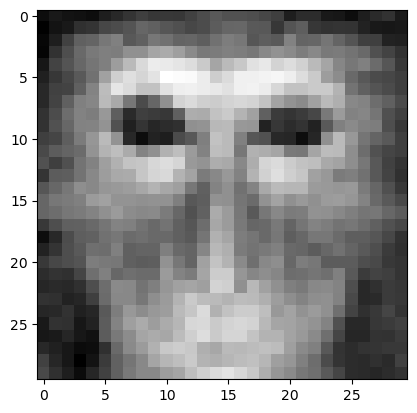

This is a picture of monkey


In [21]:
# @title ditect the image
User_path="Test02.png" # @param {type:"string"}
img = cv2.imread(User_path, cv2.IMREAD_GRAYSCALE)
imgplot = plt.imshow(img,cmap='gray')
plt.show(imgplot)
img = np.reshape(img,(1, 900))[0]
if(np.dot(img,normal)-bias>0):
    print("This is a picture of monkey")
else:
    print("This is a picture of human")

0.6285714285714286
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.6285714285714286
0.5
0.6571428571428571
0.5
0.5
0.6571428571428571
0.5
0.5
0.7857142857142857
0.5
0.6
0.7142857142857143
0.5
0.8857142857142857
0.5
0.7
0.6285714285714286
0.5428571428571428
0.8857142857142857
0.8142857142857143
0.8285714285714286
0.5
0.8571428571428571
0.8428571428571429
0.5714285714285714
0.8714285714285714
0.6857142857142857
0.7714285714285715
0.6285714285714286
0.6571428571428571
0.9142857142857143
0.5428571428571428
0.7142857142857143
0.5
0.8714285714285714
0.5
0.8
0.7428571428571429
0.6857142857142857
0.5142857142857142
0.5
0.9285714285714286
0.5142857142857142
0.8714285714285714
0.5142857142857142
0.8
0.8285714285714286
0.5142857142857142
0.5428571428571428
0.9285714285714286
0.5285714285714286
0.9571428571428572
0.5571428571428572
0.8714285714285714
0.9285714285714286
0.9428571428571428
0.5142857142857142
0.9285714285714286
0.6428571428571429
0.9857142857142858
0.6714285714285714
0.8571428571428571
0.9
0.72857

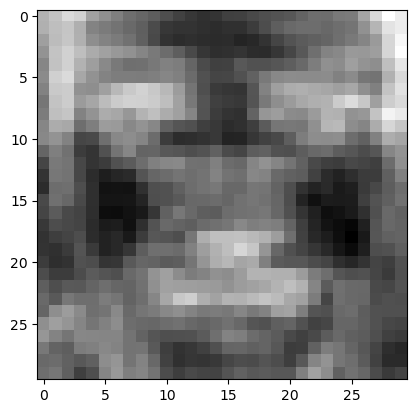

In [16]:
# @title Generration aimation
fig,imgplot= plt.subplots() 
def init():
    bias,normal=PLA_with_bias(image_data, lable_data, 0)
    weight=normal
    weight=np.reshape(weight, (30, 30))
    imgplot = plt.imshow(weight,cmap='gray')
def run(data):
    bias,normal=PLA_with_bias(image_data, lable_data, data)
    weight=normal
    weight=np.reshape(weight, (30, 30))
    imgplot = plt.imshow(weight,cmap='gray')
ani = animation.FuncAnimation(fig, run, frames=100, init_func=init) 
ani.save('generation_animation.gif', fps=5)   # 儲存為 gif
plt.show()